## Import the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Position_Salaries.csv")
## in this dataset 'Position' is categorical and 'Level' looks like encoding of 'Position', so we drop 'Position'
X = df.iloc[:, 1:-1].values ##takes all col from 1 and except last
Y = df.iloc[:, -1].values

In [3]:
print (X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print (Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Handle Missing Values - there are no missing values

Handle categorical IVs - performing OneHotEncoding -- there are no categ IVs

## Building Linear Regr model with whole dataset

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()  
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Building Polynomial Reg Model
create the x1,x1^2,x1^3,...,x1^n using PolynomialFeatures class
and then fit the generated poly x values in a linear reg model

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6)  ## giving the max x power 'n' value, you can train the model with higher 'n' value to get a good polynomial curve that fits all scatter points
## try n = 2, 4(suits best, see the diff for yourself), 6
x_poly = poly.fit_transform(X) #you fit_transform X_train

In [20]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, Y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualizing Linear Model

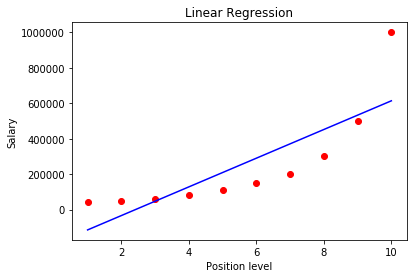

In [8]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualizing Polynomial Reg model

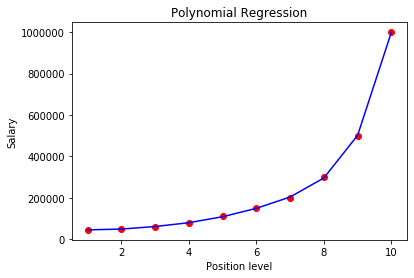

In [21]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg_2.predict(x_poly), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predict Values with Linear Regression

In [10]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predict Values with Polynomial Regression

In [11]:
lin_reg_2.predict(poly.fit_transform([[6.5]]))

array([158862.4526515])

**Visualising the Polynomial Regression results (for higher resolution and smoother curve)**

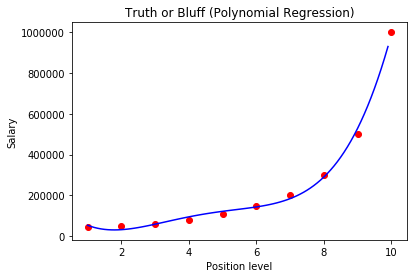

In [12]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Model Evaluation in Regression model 
> r square and adjusted r squared is used
> r square is the goodness of fit -  higher the value is better the model- i.e closer to 1 is better

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined